In [1]:
# Import Dependencies
%matplotlib inline
from ipywidgets import widgets
from IPython.display import display
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.plotly as py
import os
from plotly.graph_objs import *
from plotly.widgets import GraphWidget
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\User\Anaconda3\envs\PythonData1\lib\site-packages\IPython\html.py:14: ShimWarning:

The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.

C:\Users\User\Anaconda3\envs\PythonData1\lib\site-packages\plotly\widgets\graph_widget.py:13: UserWarning:

IPython.utils.traitlets has moved to a top-level traitlets package.



<IPython.core.display.Javascript object>

In [2]:
# Create the yearlist
year_list=["2012","2013","2014","2015","2016"]
# Assign filename
file_names="MentalHealth"
# Create a dictionary to stor dataframe for all years
All_DF={}

# Loop through each year
for years in year_list:
    #create filename based on filename, year
    file_name=file_names+years+".csv"
    #assign file path
    filepath=os.path.join("..","raw_data","output",file_name)
    #store data frme to dictionary with years as key and dataframe as value
    All_DF[years]=pd.read_csv(filepath,low_memory=False)
    print("Completed File :" + filepath)

    # Assign markers and palette for use in graphs
markers=["o","D","8","s",">","<","^","v","X","P","H","*","h","d","p"]
colors=["maroon","red","lightsalmon","orange","yellow","goldenrod","lightgreen","green","seagreen",
        "teal","skyblue","blue","indigo","lavender","violet"]

Completed File :..\raw_data\output\MentalHealth2012.csv
Completed File :..\raw_data\output\MentalHealth2013.csv
Completed File :..\raw_data\output\MentalHealth2014.csv
Completed File :..\raw_data\output\MentalHealth2015.csv
Completed File :..\raw_data\output\MentalHealth2016.csv


## Trends Based on State and Filters

In [3]:
# Create the GUI as  a Slider for the Year
Year = widgets.IntSlider(
    value=2012,
    min=2012,
    max=2016,
    step=1,
    description='Year:',
    continuous_update = False
)

# Creating a list of all the unique states in the DF and appending "ALL" to the list
Statelist=list(All_DF["2014"]['State'].unique())
Statelist.append("ALL")
# Creating a drop down for the States
state = widgets.Dropdown(
    options=Statelist,
    value='ALL',
    description='State',
)

# Create the list of filters
Selectionlist=["Gender","Age_Range","Race","Employment_Status","MetroStatusCode","Health_Coverage"]
# Creating a drop down for the filte
select = widgets.Dropdown(
    options=Selectionlist,
    value='Gender',
    description='Filter:',
)

In [4]:
# Create a function to respond based on button click
def response(change):
    
    plt.clf()
    
    # Extract dataframe from dictionary based on year
    DF=All_DF[str(Year.value)]
   
    # Based on selected state , display graph. If state=ALL, plot details for USA
    if state.value!="ALL":
        # Create filter list, with mental weight factor>40 and the state
        filter_list = [i and j for i,j in zip(DF['State'] == state.value,DF["Calc_MentalHealth_Value"]>40)]
        # Assign filtered dataframe to t_df
        t_df=DF[filter_list]
        # Create temp_df to get count of mental weight factor
        temp_df = t_df.pivot_table(index=select.value,values="Calc_MentalHealth_Value", aggfunc='count')
        # Give plot features
        sns.set_style("whitegrid")
        sns.set_context(rc={"figure.figsize":(12,9)})
        # Plot bargraph
        fig=sns.barplot(x="Calc_MentalHealth_Value",y=temp_df.index.values,data=temp_df,palette=sns.set_palette(colors))
        # Set titles and labels
        plt.title("%s vs Number of People having Mental Health in %s for %s"%(select.value,state.value,Year.value),fontsize=14)
        fig.set(xlabel='Number of People having Mental Health Issues', ylabel=select.value)
        # Set filepath and name for saving graph
        filename ="%s vs Mental Health_%s for %s.png"%(select.value,state.value,Year.value)
        filepath=os.path.join("..","Analysis_Output",str(Year.value),filename)
        plt.savefig(filepath)
        print("The file has been saved in the path:\n %s"%filepath)
        # Display the graph
        plt.show()

    else:
        # Create filter list, with mental weight factor>40, for USA(ALL)
        filter_list = [i  for i in zip(DF["Calc_MentalHealth_Value"]>40)]
        # Assign filtered dataframe to t_df
        t_df = DF[filter_list]
        # Create temp_df to get count of mental weight factor
        temp_df = t_df.pivot_table(index=select.value,values="Calc_MentalHealth_Value", aggfunc='count')
        # Give plot features
        sns.set_style("whitegrid")
        sns.set_context(rc={"figure.figsize":(12,9)})
        # Set titles and labels
        fig=sns.barplot(x="Calc_MentalHealth_Value",y=temp_df.index.values,data=temp_df,palette=sns.set_palette(colors))
        plt.title("%s vs Number of People having Mental Health in %s for %s"%(select.value,"USA",Year.value),fontsize=14)
        fig.set(xlabel='Number of People having Mental Health Issues', ylabel=select.value)
        # Set filepath and name for saving graph
        filename ="%s vs Mental Health_%s for %s.png"%(select.value,"USA",Year.value)
        filepath=os.path.join("..","Analysis_Output",str(Year.value),filename)
        plt.savefig(filepath)
        print("The file has been saved in the path:\n %s"%filepath)
        # Display the graph
        plt.show()


Filtered Analysis Graphs



HBox(children=(IntSlider(value=2012, continuous_update=False, description='Year:', max=2016, min=2012),))

HBox(children=(Dropdown(description='State', index=52, options=('AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'GU', 'PR', 'ALL'), value='ALL'),))

HBox(children=(Dropdown(description='Filter:', options=('Gender', 'Age_Range', 'Race', 'Employment_Status', 'MetroStatusCode', 'Health_Coverage'), value='Gender'),))

Button(description='Generate Graph', style=ButtonStyle())

The file has been saved in the path:
 ..\Analysis_Output\2012\Age_Range vs Mental Health_NY for 2012.png


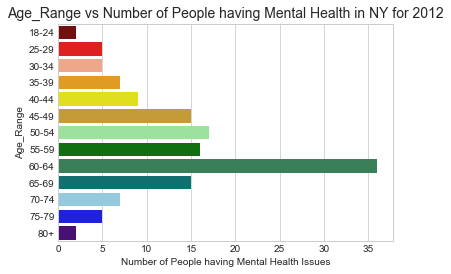

In [5]:
print("Filtered Analysis Graphs\n")

# Assign containers for placing GUI
container1 = widgets.HBox([Year])
display(container1)
container2 = widgets.HBox([state])
display(container2)
container3 =  widgets.HBox([select])
display(container3)
# Create a button to generate graph
button=widgets.Button(description="Generate Graph")
display(button)

button.on_click(response)


### Trend Across Years

In [6]:
# Function filter_df() used to create df based on a criteria selected by user
def filter_df(criteria):
    #set flag
    flag=True
    for year in year_list:
        # Based on year filter out df
        DF=All_DF[year]
        # Give the mental health factor count filter
        DF=DF[DF["Calc_MentalHealth_Value"]>40]
        # If it is the first file, create dataframe as store values
        if flag:
            # Create datafraem with count of people with mental factor>40
            year_df=DF.pivot_table(index=criteria, values="Calc_MentalHealth_Value",aggfunc='count')
            year_df=year_df.rename(columns={"Calc_MentalHealth_Value":year})
            # Reset index
            year_df=year_df.reset_index()
            # SET flag to false
            flag=False
        else:
            # Since it is second file(if flag=false), create other df and merge based on criteria
            new_df=DF.pivot_table(index=criteria, values="Calc_MentalHealth_Value",aggfunc='count')
            new_df=new_df.rename(columns={"Calc_MentalHealth_Value":year})
            # Reset index
            new_df=new_df.reset_index()
            # Merge the dfs
            year_df=year_df.merge(new_df,on=criteria)
    # Return the df
    return year_df
     


In [7]:
# Create the GUI as  a Dropdown for the Filter

options=["Gender","Employment_Status", "Age_Range" ,"Race","MetroStatusCode"]

select_line = widgets.Dropdown(
    options=options,
    value='Gender',
    description='Filter:',
)



In [8]:
# Function to check response
def response_line(change):
    fig, ax = plt.subplots(figsize=(10,5))
    
    # Create df using select criteria
    NDF=filter_df(select_line.value)
    NDF=NDF.set_index(select_line.value)
    sns.set_style("whitegrid")
    sns.set_context(rc={"figure.figsize":(12,9)})
    i=0

    for index,row in NDF.iterrows():  
        # Set x and y axis
        x_axis=year_list
        y_axis=row
        # Create the graph
        ax.plot(x_axis,y_axis,marker=markers[i],c=colors[i], linestyle='--',markeredgecolor='black',)
        i+=1
    # Set x and y axis
    ax.set_xlabel("Years")
    ax.set_ylabel("Mental Health")
    plt.title("%s vs Mental Health from 2012 to 2016"%(select_line.value))
    plt.legend(loc = 'best',bbox_to_anchor=(1, 0.5), frameon=True)
    # Set filepath and name for saving graph
    filename ="%s vs Mental Health_%s from %s.png"%(select_line.value,"USA" ,"2012 to 2016")
    filepath=os.path.join("..","Analysis_Output","Across_Years_Analysis",filename)
    plt.savefig(filepath,bbox_inches='tight')
    print("The file has been saved in the path:\n %s"%filepath)
    
    plt.show()
    

HBox(children=(Dropdown(description='Filter:', options=('Gender', 'Employment_Status', 'Age_Range', 'Race', 'MetroStatusCode'), value='Gender'),))

Button(description='Generate Graph', style=ButtonStyle())

The file has been saved in the path:
 ..\Analysis_Output\Across_Years_Analysis\Gender vs Mental Health_USA from 2012 to 2016.png


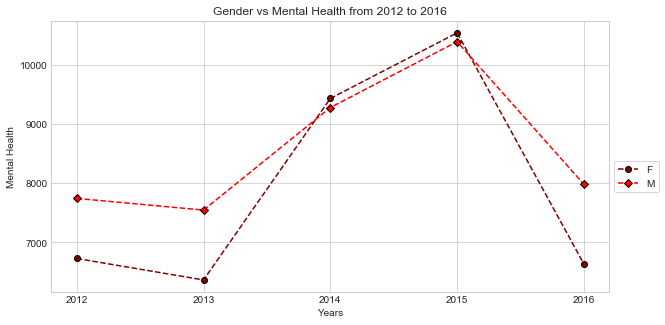

The file has been saved in the path:
 ..\Analysis_Output\Across_Years_Analysis\Employment_Status vs Mental Health_USA from 2012 to 2016.png


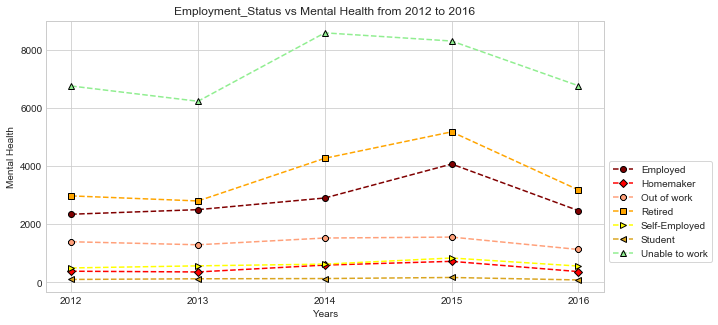

The file has been saved in the path:
 ..\Analysis_Output\Across_Years_Analysis\Age_Range vs Mental Health_USA from 2012 to 2016.png


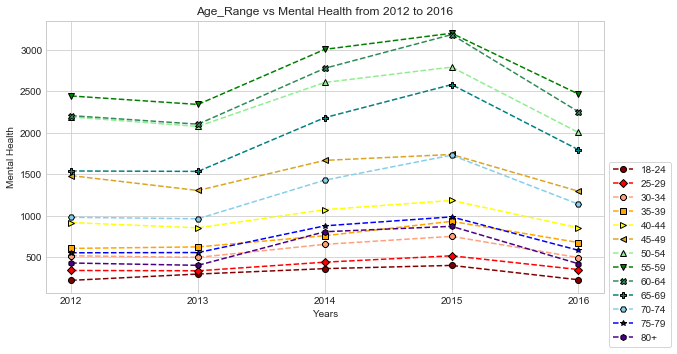

The file has been saved in the path:
 ..\Analysis_Output\Across_Years_Analysis\Race vs Mental Health_USA from 2012 to 2016.png


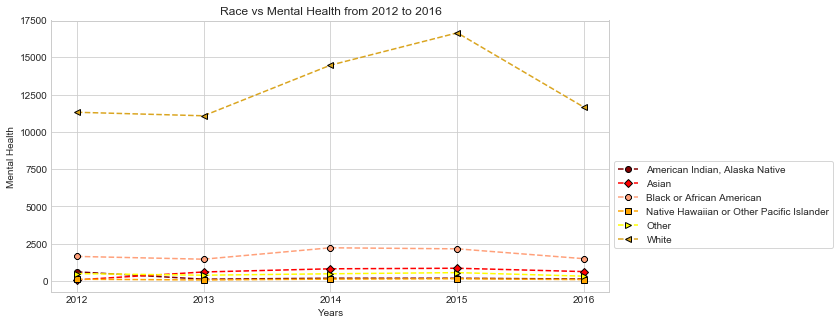

The file has been saved in the path:
 ..\Analysis_Output\Across_Years_Analysis\MetroStatusCode vs Mental Health_USA from 2012 to 2016.png


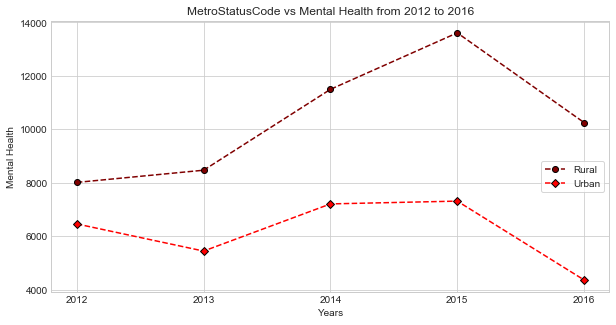

In [9]:
# Assign containers for placing GUI
container =  widgets.HBox([select_line])
display(container)
button_line=widgets.Button(description="Generate Graph")
display(button_line)

# Create a button to generate graph
button_line.on_click(response_line)